In [6]:
import re
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def load_img(fn):
    #Duplicated from btviewer :/
    try:
        rawdata = np.load(fn,allow_pickle=True)
    except OSError:
        return None,None,None
    if type(rawdata)==list:
        n, img, data = rawdata
    if type(rawdata)==dict:
        n = rawdata['index']
        img = rawdata['img']
        data = rawdata['record']
    return n,img,data

In [4]:
def getcolour(img,x,y):
    x = (x//2)*2
    y = (y//2)*2
    patch = img[y-6:y+6,x-6:x+6].astype(float)
    #plt.imshow(patch)
    #plt.colorbar()
    r = np.mean(patch[::2,::2])
    g = np.mean(patch[1::2,::2])/2+np.mean(patch[::2,1::2])/2
    b = np.mean(patch[1::2,1::2])
    return r,g,b

In [46]:
#import pickle
#cam_types = pickle.load(open('cache/cam_types.pkl','rb'))
#avgimgs = {}
#avgNs = {}
#for camnum,bts in beetracks.items():
#    N = 0
#    avgimg = {}
#    avgN = {}
#    for imgnum,bt in list(bts.items()):
#        for tagitem in bt:
#            fn = tagitem['fn']
#            if fn is None: continue #hmm?
#            camid = re.findall('photo_object_([0-9A-Z]*)_',fn)[0]                
#            if cam_types[camid]['type']=='grey': continue
#            
#            n,img,data = load_img(fn)
#            if not data['flash']: continue
#            if camid not in avgimg: 
#                avgimg[camid] = img.astype(float).copy()
#                avgN[camid] = 0
#            else:
#                avgimg[camid] += img.astype(float)
#            avgN[camid]+=1
#    avgimgs[camnum]=avgimg
#    avgNs[camnum]=avgN
#plt.figure(figsize=[20,20])
#plt.imshow(avgimgs['4']['02D53783700']/avgNs['4']['02D53783700'],clim=[0,10])    

In [7]:
cam_types = pickle.load(open('cache/cam_types.pkl','rb'))
pathtojsonfile = '/home/mike/Documents/Research/bee/photos2022/140722/bee_track.json'
beetracks = json.load(open(pathtojsonfile,'rb'))
alllabels = {}
lastimg = []
for camnum,bts in beetracks.items():
    labels = {}
    for imgnum,bt in list(bts.items()):
        for tagitem in bt:
            if 'label' in tagitem:
                #if tagitem['label']=='none': continue
                labeltype, labelnum, units = re.findall('([a-zA-Z]*)([0-9]*)([a-zA-Z]*)',tagitem['label'])[0]
                if labeltype not in labels: labels[labeltype] = []
                
                fn = tagitem['fn']
                if fn is None: continue
                camid = re.findall('photo_object_([0-9A-Z]*)_',fn)[0]
                
                if cam_types[camid]['type']=='grey':
                    continue #too tricky
                #    othercam = cam_types[camid]['other']
                #    if othercam is None:
                #        print("No colour camera")
                #    else:
                #        print(camid,othercam)
                #        fn = fn.replace(camid,othercam)
                
                
                deg = (units=='deg')
                x,y = tagitem['x'],tagitem['y']
                n,img,data = load_img(fn)
                if 'shift' in tagitem:
                    x = x - tagitem['shift'][1]
                    y = y - tagitem['shift'][0]

                plt.figure(figsize=[6,3])
                plt.subplot(1,2,1)
                plt.imshow(img[y-10:y+10,x-10:x+10],clim=[0,20],cmap='gray')
                plt.subplot(1,2,2)
                if len(lastimg)>5:
                    scale = np.mean(img.astype(float))/np.mean(lastimg[0])
                    plt.imshow((img.astype(float)-scale*lastimg[0])[y-10:y+10,x-10:x+10],clim=[0,20],cmap='gray')
                #if len(lastimg)>10:
                    lastimg.pop(0)
                lastimg.append(img.astype(float))
                #plt.plot(x,y,'o',fillstyle='none')
                #plt.xlim([x-20,x+20])
                #plt.ylim([y+20,y-20])
                r,g,b = getcolour(img,x,y)
                ar,ag,ab = 0,0,0
                if len(lastimg)>0:
                    ar,ag,ab = getcolour((img.astype(float)-scale*lastimg[0]),x,y)
                plt.plot([4,16,16,4,4],[4,4,16,16,4],'-y')
                plt.title("%s %s %s (%d %d: %d %d %d)" % (camid,cam_types[camid]['type'],fn[-20:],x,y,r,g,b))
                #if labeltype[:3]=='cal':
                if len(labeltype)==0: labeltype = 'none'
                try:
                    labelnum = float(labelnum)
                except ValueError:
                    labelnum = -1
                labels[labeltype].append([labelnum,deg,r,g,b,ar,ag,ab])
    lastimg = []
    alllabels[camnum]=labels

FileNotFoundError: [Errno 2] No such file or directory: 'cache/cam_types.pkl'

In [100]:
for a in alllabels: print(a)

4
2
5


In [111]:
np.sum(tagrgbs,1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

[33.91666667 35.375      36.91666667 26.34722222 24.33333333 22.77777778
 92.51388889 69.19444444 73.52777778 18.80555556 20.80555556 33.34722222
 52.95833333 54.66666667 31.81944444 47.29166667 70.66666667 92.15277778
 93.58333333 95.97222222 65.94444444 55.375      90.65277778 88.97222222
 69.38888889 93.68055556 93.54166667 78.31944444 85.31944444 61.11111111
 27.23611111 31.77777778 21.98611111 32.48611111 27.66666667 19.48611111
 30.11111111 40.88888889 28.51388889 28.51388889 40.625      37.91666667
 36.93055556 30.55555556 19.27777778 16.23611111 30.06944444 12.
 24.61111111 34.625      28.65277778 30.40277778 28.61111111 19.04166667
 38.         48.66666667 22.90277778 22.30555556 50.69444444 40.44444444
 16.33333333 15.06944444 37.66666667 56.06944444 19.93055556 24.52777778
 25.06944444  8.38888889]
[24.05555556 24.31944444 23.97222222 19.65277778 14.86111111 22.
 14.06944444  7.33333333  8.          7.61111111  8.68055556  7.79166667
  8.20833333  9.08333333  9.65277778  8.6

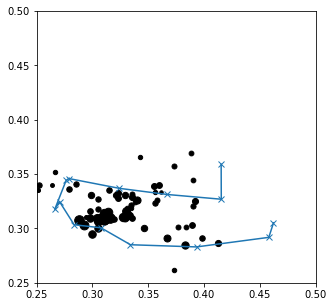

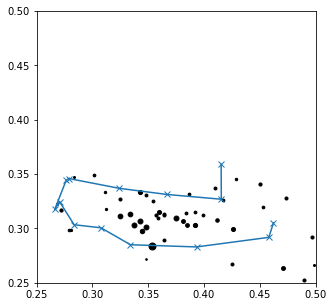

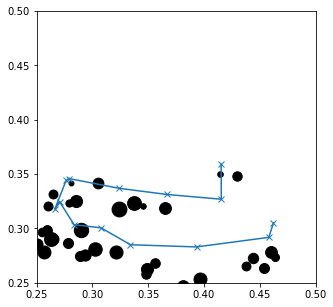

In [114]:
calrgbs = np.array(alllabels['4']['calA'])[3:,2:5]
calrgbs/=np.sum(calrgbs,1)[:,None]
#plt.plot(calrgbs[:,0],calrgbs[:,1],'-x')
for camnum in ['2','4','5']: 
    plt.figure(figsize=[5,5])
    plt.plot(calrgbs[:,0],calrgbs[:,1],'-x')
    
    tagrgbs = np.array(alllabels[camnum]['none'])[:,2:5] #labelnum, deg, r,g,b [r,g,b]
    s = np.sum(tagrgbs,1)
    print(s)
    tagrgbs/=np.sum(tagrgbs,1)[:,None]
    for i,t in enumerate(tagrgbs):
        plt.scatter(t[0],t[1],s[i],color='k')
    #plt.plot(tagrgbs[:,0],tagrgbs[:,1],'x')
    
    plt.xlim([0.25,0.5])
    plt.ylim([0.25,0.5])
    #plt.axis('equal')
#rgbs = np.array(alllabels['4']['calA'])[3:,5:]
#rgbs/=np.sum(rgbs,1)[:,None]
#plt.plot(rgbs[:,0],rgbs[:,1],'-.')